## Business Problem

Dataset ini adalah catatan dari setiap bangunan atau unit bangunan (apartemen, dll.) yang dijual di pasar properti Kota New York selama periode 12 bulan. Tujuan utamanya adalah menganalisis Dataset Penjualan Properti NYC dan mencari informasi tentang pasar properti di New York City menggunakan metode statistik. Dataset ini berisi informasi tentang lokasi, jenis, harga jual, dan tanggal penjualan unit bangunan yang terjual di kota tersebut.

Analisis ini melibatkan merumuskan pertanyaan yang terkait dengan dataset dan menghasilkan uji hipotesis statistik untuk menjawab pertanyaan tersebut. Tujuannya adalah untuk menunjukkan kemampuan dalam mengambil keputusan berdasarkan data dengan cara yang ilmiah. Contoh pertanyaan yang diberikan dalam deskripsi tugas ini antara lain:

1. Apakah ada perbedaan dalam jumlah unit yang terjual antara properti yang dibangun antara tahun 1900-2000 dan setelah tahun 2001?
2. Apakah ada perbedaan dalam jumlah unit yang terjual berdasarkan kategori bangunan?
3. Apa yang dapat ditemukan tentang pasar properti New York City dengan melihat catatan transaksi mentah selama satu tahun? Bisakah tren dalam pasar teridentifikasi?
4. Lalu Mencari Measure of Tendency, Spread, Probability Distribution, Confidence Intervals, Hypothesis Testing

Dengan mengeksplorasi dataset, melakukan analisis statistik, dan menginterpretasikan hasilnya, Anda dapat memperoleh wawasan tentang pasar properti New York City, mengidentifikasi tren, dan menyimpulkan berdasarkan data yang ada.

## Import Library

Berikut adalah Library yang akan kita gunakan

In [37]:
import statistics
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats.distributions as dist
pd.options.display.float_format = '{:.2f}'.format

## Data Preparation

Lalu coba kita read menggunakan **pandas** namun yang berbeda kita akan langsung mengecek *missing values* yang terdapat dalam data tersebut seperti contoh dibawah ini 

In [38]:
missing_values = ["n/a", "na", "--"," -  ","NaN"," ","nan"]
df = pd.read_csv('dataset/nyc-rolling-sales.csv', na_values=missing_values)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633.00,6440.00,1900,2,C2,6625000.00,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616.00,18690.00,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212.00,7803.00,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272.00,6794.00,1913,2,C4,3936272.00,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369.00,4615.00,1900,2,C2,8000000.00,2016-11-17 00:00:00


Lalu kita coba mengganti seluruh *missing value* yang terdapat didalam data tersebut menjadi **NaN** supaya dalam pengecekan *missing value* nanti bisa terdeteksi

In [39]:
# Mengganti missing values yang diketahui dengan NaN
df.replace(["n/a", "na", "--", " -  ", "NaN", " ", "nan"], float("NaN"), inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

Berikut adalah penjelasan singkat mengenai kolom-kolom dalam dataset tersebut:

1. BOROUGH: Menyimpan informasi mengenai borough (daerah) di New York City di mana properti terletak. Nilai-nilai yang mungkin adalah 1, 2, 3, 4, atau 5, yang masing-masing mewakili Manhattan, Bronx, Brooklyn, Queens, dan Staten Island.

2. NEIGHBORHOOD: Menyimpan informasi mengenai nama lingkungan di mana properti terletak.

3. BUILDING CLASS CATEGORY: Menyimpan informasi mengenai kategori kelas bangunan. Ini menggambarkan tipe umum atau penggunaan properti seperti apartemen, gedung perkantoran, atau toko ritel.

4. TAX CLASS AT PRESENT: Menyimpan informasi mengenai kelas pajak properti saat ini. Ini mencerminkan status pajak properti pada saat penjualan.

5. BLOCK: Menyimpan nomor blok tempat properti berada. Nomor blok adalah identifikasi unik yang digunakan dalam sistem pemetaan kota.

6. LOT: Menyimpan nomor lot tempat properti berada. Nomor lot adalah identifikasi unik yang digunakan dalam sistem pemetaan kota.

7. EASE-MENT: Kolom ini mungkin berisi informasi mengenai hak istimewa atau jaminan tertentu yang terkait dengan properti.

8. BUILDING CLASS AT PRESENT: Menyimpan informasi mengenai kelas bangunan saat ini. Ini menggambarkan jenis bangunan yang ada pada properti, misalnya apartemen, gedung perkantoran, atau toko ritel.

9. ADDRESS: Menyimpan alamat lengkap properti.

10. APARTMENT NUMBER: Jika properti adalah unit apartemen, kolom ini menyimpan nomor unit apartemen.

11. ZIP CODE: Menyimpan kode pos untuk alamat properti.

12. RESIDENTIAL UNITS: Menyimpan jumlah unit perumahan dalam properti.

13. COMMERCIAL UNITS: Menyimpan jumlah unit komersial dalam properti.

14. TOTAL UNITS: Menyimpan total jumlah unit (perumahan dan komersial) dalam properti.

15. LAND SQUARE FEET: Menyimpan luas tanah dalam satuan kaki persegi.

16. GROSS SQUARE FEET: Menyimpan luas total bangunan dalam satuan kaki persegi.

17. YEAR BUILT: Menyimpan tahun pembangunan properti.

18. TAX CLASS AT TIME OF SALE: Menyimpan kelas pajak properti pada saat penjualan.

19. BUILDING CLASS AT TIME OF SALE: Menyimpan kelas bangunan pada saat penjualan. Ini menggambarkan jenis bangunan yang ada pada properti pada saat penjualan.

20. SALE PRICE: Menyimpan harga penjualan properti.

21. SALE DATE: Menyimpan tanggal penjualan properti.

In [41]:
df.shape

(84548, 22)

Lalu kita mengecek apakah terdapat missing values

In [42]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Pada Kasus ini kita akan medrop kolom Apartemen Number, ZIP CODE, Unnamed: 0, dan EASEMENT. Untuk Kolom Apartemen Number dan EASEMENT karena banyak missing value, oleh karena itu kita drop, untuk ZIP CODE,Unnamed: 0 kita drop karena tidak terpakai, lalu kolom seperti **LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT** akan kita drop saja beberapa value yang kosong

In [43]:
kolom_hapus = ['ZIP CODE', 'APARTMENT NUMBER', 'EASE-MENT','Unnamed: 0']
df_clean = df.drop(columns=kolom_hapus)
df_clean.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633.00,6440.00,1900,2,C2,6625000.00,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616.00,18690.00,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212.00,7803.00,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272.00,6794.00,1913,2,C4,3936272.00,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369.00,4615.00,1900,2,C2,8000000.00,2016-11-17 00:00:00


In [44]:
# Mendrop baris yang mengandung missing values
df_clean.dropna(subset=['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE'], inplace=True)

# Mengatur ulang index jika diperlukan
df_clean.reset_index(drop=True, inplace=True)

# Menampilkan dataframe setelah drop missing values
df_clean.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633.00,6440.00,1900,2,C2,6625000.00,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272.00,6794.00,1913,2,C4,3936272.00,2016-09-23 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369.00,4615.00,1900,2,C2,8000000.00,2016-11-17 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,8,0,8,1750.00,4226.00,1920,2,C4,3192840.00,2016-09-23 00:00:00
4,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,24,0,24,4489.00,18523.00,1920,2,D9,16232000.00,2016-11-07 00:00:00


Lalu coba kita mengecek kembali data kita setelah di cleaning

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47892 entries, 0 to 47891
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47892 non-null  int64  
 1   NEIGHBORHOOD                    47892 non-null  object 
 2   BUILDING CLASS CATEGORY         47892 non-null  object 
 3   TAX CLASS AT PRESENT            47892 non-null  object 
 4   BLOCK                           47892 non-null  int64  
 5   LOT                             47892 non-null  int64  
 6   BUILDING CLASS AT PRESENT       47892 non-null  object 
 7   ADDRESS                         47892 non-null  object 
 8   RESIDENTIAL UNITS               47892 non-null  int64  
 9   COMMERCIAL UNITS                47892 non-null  int64  
 10  TOTAL UNITS                     47892 non-null  int64  
 11  LAND SQUARE FEET                47892 non-null  float64
 12  GROSS SQUARE FEET               

Lalu kita cek apakah masih terdapat *missing value*?

In [46]:
df_clean.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Exploration Data Analysis

Lalu dalam tahap exploration analisis data, kita mengecek data yang unik setiap kolom

In [47]:
unique_values = df_clean.apply(lambda x: x.unique())
unique_values

BOROUGH                                                             [1, 2, 3, 4, 5]
NEIGHBORHOOD                      [ALPHABET CITY, CHELSEA, CHINATOWN, CIVIC CENT...
BUILDING CLASS CATEGORY           [07 RENTALS - WALKUP APARTMENTS             , ...
TAX CLASS AT PRESENT                           [2A, 2B, 2, 4, 1, 2C, 1A, 1B, 3, 1C]
BLOCK                             [392, 402, 404, 406, 387, 400, 376, 391, 393, ...
LOT                               [6, 21, 55, 32, 153, 14, 19, 4, 5, 34, 52, 29,...
BUILDING CLASS AT PRESENT         [C2, C4, D9, D1, C6, S3, S4, S5, K4, A9, A4, S...
ADDRESS                           [153 AVENUE B, 154 EAST 7TH STREET, 301 EAST 1...
RESIDENTIAL UNITS                 [5, 10, 6, 8, 24, 3, 4, 0, 1, 2, 22, 9, 15, 30...
COMMERCIAL UNITS                  [0, 1, 2, 3, 13, 5, 4, 19, 10, 14, 8, 6, 35, 5...
TOTAL UNITS                       [5, 10, 6, 8, 24, 4, 1, 3, 7, 9, 16, 32, 13, 1...
LAND SQUARE FEET                  [1633.0, 2272.0, 2369.0, 1750.0, 4489.0, 3

In [48]:
df_clean.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,47892.00,47892.00,47892.00,47892.00,47892.00,47892.00,47892.00,47892.00,47892.00,47892.00,47892.00
mean,3.25,4983.74,227.45,2.59,0.25,2.86,3382.80,3696.72,1841.20,1.47,1155606.87
std,0.91,3429.69,491.17,17.53,11.03,20.83,31549.89,29581.35,438.73,0.83,13450223.66
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,3.00,2188.00,21.00,1.00,0.00,1.00,1470.00,882.00,1920.00,1.00,80560.00
50%,3.00,4660.00,44.00,1.00,0.00,1.00,2150.00,1632.00,1931.00,1.00,480000.00
75%,4.00,6973.00,90.00,2.00,0.00,2.00,3097.25,2520.00,1961.00,2.00,829682.50
max,5.00,16319.00,9009.00,1844.00,2261.00,2261.00,4228300.00,3750565.00,2017.00,4.00,2210000000.00


Dalam kasus ini kita coba lihat pada tahun berapa Sale Price tertinggi 

In [49]:
df_neigh = df_clean.groupby(['YEAR BUILT'], as_index = False)['SALE PRICE'].sum().sort_values(by = "SALE PRICE", ascending =False)
df_neigh

,YEAR BUILT,SALE PRICE
53,1920,4371608893.00
43,1910,3358419922.00
63,1930,2627996620.00
99,1966,2312534094.00
58,1925,2299491271.00
...,...,...
31,1898,535000.00
11,1850,282000.00
29,1895,100000.00
5,1840,0.00


Ternyata pada Tahun 1920 yang memiliki Sale Price tertinggi yaitu sebesar 4.371.608.893

In [50]:
# df_neigh_count = df_clean.groupby(['NEIGHBORHOOD'], as_index=False).agg(SALE_PRICE_SUM=('SALE PRICE', 'sum'), NEIGHBORHOOD_COUNT=('NEIGHBORHOOD', 'count')).sort_values(by='SALE_PRICE_SUM', ascending=False)
# df_neigh_count

Untuk itu coba kita lihat apa yang terjadi pada Tahun 1920

In [51]:
df_midtown = df_clean[df_clean['YEAR BUILT']== 1920]
df_midtown

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,8,0,8,1750.00,4226.00,1920,2,C4,3192840.00,2016-09-23 00:00:00
4,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,24,0,24,4489.00,18523.00,1920,2,D9,16232000.00,2016-11-07 00:00:00
15,1,CHELSEA,02 TWO FAMILY DWELLINGS,1,769,49,S2,218 WEST 20TH STREET,2,1,3,2150.00,4978.00,1920,1,S2,7750000.00,2017-04-17 00:00:00
25,1,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,770,53,C1,222 WEST 21ST STREET,9,0,9,2029.00,8540.00,1920,2,C1,29400000.00,2016-11-10 00:00:00
26,1,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,790,8,C7,149 WEST 14TH STREET,8,1,9,2581.00,7650.00,1920,2,C7,6450000.00,2017-02-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47641,5,WESTERLEIGH,02 TWO FAMILY DWELLINGS,1,439,21,B3,273 NEAL DOW AVENUE,2,0,2,6000.00,1648.00,1920,1,B3,560000.00,2017-02-10 00:00:00
47642,5,WESTERLEIGH,02 TWO FAMILY DWELLINGS,1,444,23,B2,256 DEMOREST AVENUE,2,0,2,3750.00,2224.00,1920,1,B2,559000.00,2017-04-26 00:00:00
47661,5,WESTERLEIGH,02 TWO FAMILY DWELLINGS,1,1483,24,B2,51 JAFFE STREET,2,0,2,4800.00,2268.00,1920,1,B2,243500.00,2016-11-03 00:00:00
47676,5,WESTERLEIGH,21 OFFICE BUILDINGS,4,393,10,O7,1436 FOREST AVENUE,1,1,1,3180.00,1224.00,1920,4,O7,380000.00,2017-05-25 00:00:00


## Measures of Tendency : Mean

In [52]:
df_midmean = df_midtown.groupby(['YEAR BUILT'], as_index=False)['SALE PRICE'].mean().sort_values(by="YEAR BUILT").reset_index(drop=True)
df_midmean

,YEAR BUILT,SALE PRICE
0,1920,973632.27


## Measures of Tendency : Median

In [53]:
df_median = df_midtown.groupby(['YEAR BUILT'], as_index=False)['SALE PRICE'].median().sort_values(by="YEAR BUILT").reset_index(drop=True)
df_median

,YEAR BUILT,SALE PRICE
0,1920,488000.00


## Measures of Tendency : Mode

In [54]:
mode_ = statistics.mode(df_midtown['SALE PRICE'])
mode_

0.0

Dari hasil analisis Measures of Tendency dapat kita tarik informasi seperti
1. Rata-Rata Penjualan pada Tahun 1920 yaitu sebesar 973632.27
2. Untuk Mediannya ada di kisaran 488000.00
3. Untuk Modusnya yaitu adalah ??

In [55]:
df_midtown.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,4490.00,4490.00,4490.00,4490.00,4490.00,4490.00,4490.00,4490.00,4490.00,4490.00,4490.00
mean,3.32,5836.41,82.06,2.07,0.63,2.71,2895.19,2767.01,1920.00,1.20,973632.27
std,0.83,3776.69,274.41,3.59,33.75,33.91,4413.27,18004.02,0.00,0.60,3498192.93
min,1.00,16.00,1.00,0.00,0.00,0.00,0.00,0.00,1920.00,1.00,0.00
25%,3.00,2913.75,19.00,1.00,0.00,1.00,2000.00,1280.00,1920.00,1.00,190000.00
50%,3.00,5384.00,38.00,2.00,0.00,2.00,2442.00,1720.00,1920.00,1.00,488000.00
75%,4.00,8886.75,61.00,2.00,0.00,2.00,3000.00,2491.50,1920.00,1.00,795000.00
max,5.00,16319.00,9009.00,75.00,2261.00,2261.00,200000.00,1120000.00,1920.00,4.00,93000000.00


Sebenarnya kita bisa menggunakan Describe untuk mengetahui nilai mean, median dan modus, namun tidak menjadi masalah jika kita memang ingin mengetahui secara spesifik

In [56]:
np.ptp(df_midtown['SALE PRICE'])

93000000.0

## Measures of Spread : Range

In [57]:
range_land = df_midtown['LAND SQUARE FEET'].max() - df_midtown['LAND SQUARE FEET'].min()
range_price = df_midtown['SALE PRICE'].max() - df_midtown['SALE PRICE'].min()
range_gross = df_midtown['GROSS SQUARE FEET'].max() - df_midtown['GROSS SQUARE FEET'].min()
print("Range LAND SQUARE FEET:", range_land)
print("Range GROSS SQUARE FEET:", range_gross)
print("Range SALE PRICE:", range_price)


Range LAND SQUARE FEET: 200000.0
Range GROSS SQUARE FEET: 1120000.0
Range SALE PRICE: 93000000.0


## Measures of Spread : Variance

In [58]:

variance_land = df_midtown['LAND SQUARE FEET'].var()
variance_price = df_midtown['SALE PRICE'].var()
variance_gross = df_midtown['GROSS SQUARE FEET'].var()

print("Variance LAND SQUARE FEET:", variance_land)

print("Variance GROSS SQUARE FEET:", variance_gross)
print("Variance SALE PRICE:", variance_price)



Variance LAND SQUARE FEET: 19476920.7254423
Variance GROSS SQUARE FEET: 324144770.21744436
Variance SALE PRICE: 12237353793694.717


## Measures of Spread : Standard Deviation

In [59]:
std_deviation_price = df_midtown['SALE PRICE'].std()
std_deviation_gross = df_midtown['GROSS SQUARE FEET'].std()
std_deviation_land = df_midtown['LAND SQUARE FEET'].std()

print("Standard Deviation SALE PRICE:", std_deviation_price)
print("Standard Deviation LAND SQUARE FEET:", std_deviation_land)
print("Standard Deviation GROSS SQUARE FEET:", std_deviation_gross)

Standard Deviation SALE PRICE: 3498192.932600304
Standard Deviation LAND SQUARE FEET: 4413.266446232575
Standard Deviation GROSS SQUARE FEET: 18004.020945817752


Berdasarkan hasil analisis yang dilakukan pada tahun 1920, berikut adalah kesimpulan yang dapat diambil dari data:

1. Range LAND SQUARE FEET: 200000.0

Pada tahun 1920, rentang LAND SQUARE FEET sebesar 200000.0 menunjukkan variasi luas tanah yang cukup besar antara properti yang memiliki luas tanah tertinggi dan terendah.

2. Range GROSS SQUARE FEET: 1120000.0

Rentang GROSS SQUARE FEET sebesar 1120000.0 menunjukkan variasi luas total bangunan yang cukup besar antara properti yang memiliki luas bangunan tertinggi dan terendah pada tahun 1920.

3. Range SALE PRICE: 93000000.0

Rentang SALE PRICE sebesar 93000000.0 menunjukkan variasi harga penjualan properti yang cukup besar pada tahun 1920. Rentang ini menunjukkan perbedaan antara harga penjualan tertinggi dan terendah dari properti yang terjual pada tahun tersebut.

4. Varians LAND SQUARE FEET: 19476920.7254423

Varians LAND SQUARE FEET sebesar 19476920.73 menunjukkan variasi yang signifikan dalam luas tanah pada properti tahun 1920.

5. Varians GROSS SQUARE FEET: 324144770.21744436

Varians GROSS SQUARE FEET sebesar 324144770.22 menunjukkan variasi yang cukup besar dalam luas total bangunan pada properti tahun 1920.

6. Varians SALE PRICE: 12237353793694.717

Varians SALE PRICE sebesar 12237353793694.72 menunjukkan variasi yang besar dalam harga penjualan properti pada tahun 1920.

7. Standar Deviasi SALE PRICE: 3498192.932600304

Standar deviasi SALE PRICE sebesar 3498192.93 menunjukkan bahwa harga penjualan properti pada tahun 1920 memiliki variasi yang cukup besar. Artinya, ada perbedaan yang signifikan antara harga properti yang satu dengan yang lain.

8. Standar Deviasi LAND SQUARE FEET: 4413.266446232575

Standar deviasi LAND SQUARE FEET menunjukkan tingkat variasi luas tanah pada properti. Dalam tahun 1920, standar deviasi LAND SQUARE FEET sebesar 4413.27 menunjukkan variasi yang cukup signifikan dalam ukuran tanah properti. Hal ini menunjukkan adanya perbedaan luas tanah yang cukup besar antara properti yang satu dengan yang lain.

9.  Standar Deviasi GROSS SQUARE FEET: 18004.020945817752

Standar deviasi GROSS SQUARE FEET menunjukkan tingkat variasi luas total bangunan pada properti. Dalam tahun 1920, standar deviasi GROSS SQUARE FEET sebesar 18004.02 menunjukkan variasi yang cukup signifikan dalam ukuran bangunan properti. Artinya, terdapat perbedaan luas bangunan yang cukup besar antara properti yang satu dengan yang lain.


Kesimpulan dari analisis ini adalah bahwa pada tahun 1920, terdapat variasi yang signifikan dalam harga penjualan, luas tanah, dan luas total bangunan pada properti di New York City. Perbedaan-perbedaan ini dapat disebabkan oleh faktor-faktor seperti lokasi, tipe properti, dan kondisi bangunan.

## Probability of Distribution

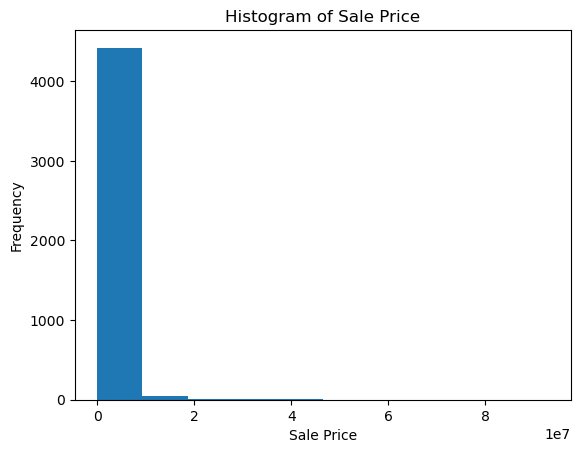

In [60]:
plt.hist(df_midtown['SALE PRICE'], bins=10)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price')
plt.show()

Dapat disimpulkan bahwa sebagian besar harga penjualan properti di Midtown cenderung berada di kisaran yang relatif rendah hingga menengah. Ini ditunjukkan oleh keberadaan nilai-nilai yang lebih rendah di sisi kiri histogram.

In [61]:
skewness_price = df_midtown['SALE PRICE'].skew()
kurtosis_price = df_midtown['SALE PRICE'].kurtosis()

print("Skewness Sale Price:", skewness_price)
print("Kurtosis Sale Price:", kurtosis_price)

Skewness Sale Price: 14.624673100947088
Kurtosis Sale Price: 288.90146133323555


Skewness: Nilai skewness Sale Price sebesar 14.624673100947088 menunjukkan bahwa distribusi harga penjualan properti di wilayah Midtown cenderung memiliki ekor panjang di sebelah kanan. Ini mengindikasikan bahwa terdapat banyak nilai penjualan properti yang jauh di atas rata-rata atau harga penjualan yang tinggi, yang menyebabkan ekor panjang di sebelah kanan distribusi.

Kurtosis: Nilai kurtosis Sale Price sebesar 288.90146133323555 menunjukkan bahwa distribusi harga penjualan properti di wilayah Midtown memiliki puncak yang sangat tinggi (leptokurtik). Ini menunjukkan bahwa distribusi memiliki ekor yang lebih tebal di sekitar nilai rata-rata dan adanya banyak penjualan properti yang jauh di atas rata-rata. Kurtosis yang tinggi juga menunjukkan adanya potensi untuk nilai-nilai penjualan yang ekstrem atau outlier.

## Confidence Interval

In [62]:
# Mengambil kolom 'SALE PRICE' dari DataFrame
data = df_midtown['SALE PRICE'].dropna()

# Menghitung mean dan standar deviasi
mean = np.mean(data)
std = np.std(data)

# Menghitung Confidence Intervals dengan tingkat kepercayaan 95%
confidence_level = 0.95
n = len(data)
confidence_interval = stats.t.interval(confidence_level, df=n-1, loc=mean, scale=std/np.sqrt(n))

# Menampilkan Confidence Intervals
print(mean)
print("Confidence Intervals (95%):", confidence_interval)

973632.270155902
Confidence Intervals (95%): (871294.1525360526, 1075970.3877757513)


Berada di antara situ

In [63]:
rata =973632.27
sd = 3498192.932600304
n = df_midtown['SALE PRICE'].count()
z = 1.96

In [64]:
se = sd / np.sqrt(n)

In [65]:
lcb = rata - z* se  #lower limit of the CI
ucb = rata + z* se  #upper limit of the CI
lcb, ucb

(871308.4702989091, 1075956.069701091)

Dari hasil perhitungan tersebut, berikut adalah kesimpulan yang dapat ditarik:

Mean (rata-rata) harga penjualan properti di Midtown adalah sebesar $ 973,632.27. Ini merupakan nilai tengah dari total harga penjualan properti yang ada dalam dataset.

Confidence interval (interval kepercayaan) dengan tingkat kepercayaan 95 persen untuk rata-rata harga penjualan properti di Midtown adalah antara 871.294 dan 1.075.970 Ini berarti dengan tingkat kepercayaan 95 persen, kita dapat mengatakan bahwa rata-rata sebenarnya dari harga penjualan properti di Midtown berada di antara rentang tersebut.

Kesimpulan ini didasarkan pada perhitungan statistik menggunakan metode confidence interval, yang memberikan estimasi rentang nilai yang mungkin mengandung parameter populasi yang sebenarnya (dalam hal ini, rata-rata harga penjualan properti di Midtown) dengan tingkat kepercayaan yang ditentukan (dalam hal ini, 95%).

# Hypothesis Testing

In [66]:
# Membagi data menjadi dua kelompok berdasarkan tahun pembangunan
properti_1900_2000 = df_clean[df_clean['YEAR BUILT'].between(1900, 2000)]
properti_2001_onwards = df_clean[df_clean['YEAR BUILT'] >= 2001]

# Melakukan uji hipotesis t independen
t_statistic, p_value = stats.ttest_ind(properti_1900_2000['TOTAL UNITS'], properti_2001_onwards['TOTAL UNITS'], equal_var=False)

# Menampilkan hasil uji hipotesis
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


T-Statistic: 5.4400326869328115
P-Value: 5.38655554321969e-08


Dalam kasus ini, karena nilai p-value sangat kecil (lebih kecil dari tingkat signifikansi yang umumnya ditetapkan pada 0.05), kita dapat menolak hipotesis nol yang menyatakan bahwa tidak ada perbedaan dalam jumlah unit yang terjual antara properti yang dibangun antara tahun 1900-2000 dan tahun 2001 dan seterusnya. Dengan demikian, kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan dalam jumlah unit yang terjual antara kedua kelompok tersebut.

Dalam konteks ini, perbedaan yang signifikan tersebut menunjukkan bahwa properti yang dibangun setelah tahun 2000 cenderung memiliki jumlah unit yang terjual lebih banyak dibandingkan properti yang dibangun antara tahun 1900-2000.

In [67]:
# Melakukan uji hipotesis Anova
result = stats.f_oneway(df_clean[df_clean['BUILDING CLASS CATEGORY'] == '07 RENTALS - WALKUP APARTMENTS             ']['TOTAL UNITS'],
                        df_clean[df_clean['BUILDING CLASS CATEGORY'] == '08 RENTALS - ELEVATOR APARTMENTS           ']['TOTAL UNITS'],
                        df_clean[df_clean['BUILDING CLASS CATEGORY'] == '09 COOPS - WALKUP APARTMENTS               ']['TOTAL UNITS'])

# Menampilkan hasil uji hipotesis
print('F-Statistic:', result.statistic)
print('P-Value:', result.pvalue)


F-Statistic: 355.2968450664295
P-Value: 8.143745547559866e-142


 Dalam kasus ini, karena nilai p-Value sangat kecil (jauh lebih kecil dari tingkat signifikansi yang umumnya digunakan yaitu 0.05), kita dapat menolak hipotesis nol. Ini berarti ada perbedaan yang signifikan dalam jumlah unit yang terjual berdasarkan kategori bangunan.

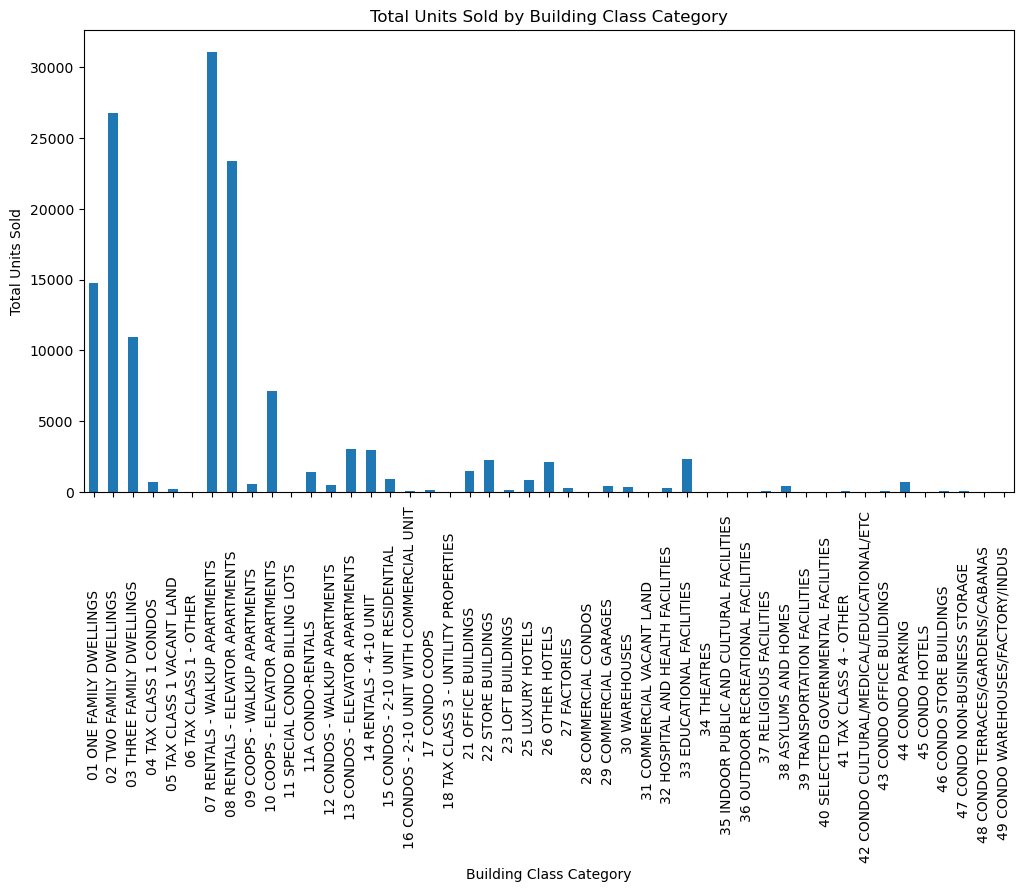

In [68]:
# Menghitung jumlah unit yang terjual berdasarkan kategori bangunan
unit_sold_by_building_category = df_clean.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].sum()

# Menampilkan grafik bar jumlah unit yang terjual berdasarkan kategori bangunan
plt.figure(figsize=(12, 6))
unit_sold_by_building_category.plot(kind='bar')
plt.xlabel('Building Class Category')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Building Class Category')
plt.xticks(rotation=90)
plt.show()


Berdasarkan hasil visualisasi, dapat dilihat bahwa terdapat perbedaan dalam jumlah unit yang terjual berdasarkan kategori bangunan. Beberapa kesimpulan yang dapat ditarik adalah:

1. Kategori bangunan dengan jumlah unit terjual tertinggi adalah "RENTALS - WALKUP APARTMENTS" dengan total 31,075 unit.
2. Kategori bangunan dengan jumlah unit terjual kedua tertinggi adalah "RENTALS - ELEVATOR APARTMENTS" dengan total 23,361 unit.
3. Kategori bangunan dengan jumlah unit terjual terendah adalah "36 OUTDOOR RECREATIONAL FACILITIES" dengan hanya 1 unit terjual.
4. Terdapat variasi yang signifikan dalam jumlah unit yang terjual antara kategori bangunan. Beberapa kategori seperti "01 ONE FAMILY DWELLINGS", "02 TWO FAMILY DWELLINGS", dan "03 THREE FAMILY DWELLINGS" juga memiliki jumlah unit terjual yang cukup tinggi.
5. Kategori bangunan seperti "11 SPECIAL CONDO BILLING LOTS", "18 TAX CLASS 3 - UNTILITY PROPERTIES", dan "39 TRANSPORTATION FACILITIES" tidak memiliki unit yang terjual.

Dengan demikian, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam jumlah unit yang terjual berdasarkan kategori bangunan. Beberapa kategori bangunan seperti apartemen sewa, rumah tangga tunggal, dan rumah tangga dua keluarga memiliki jumlah unit terjual yang tinggi, sementara kategori lainnya memiliki tingkat penjualan yang lebih rendah atau bahkan tidak ada penjualan. Hal ini menunjukkan bahwa permintaan dan preferensi pasar dapat berbeda-beda tergantung pada jenis dan kategori bangunan.

In [69]:
df_clean['SALE DATE']

0        2017-07-19 00:00:00
1        2016-09-23 00:00:00
2        2016-11-17 00:00:00
3        2016-09-23 00:00:00
4        2016-11-07 00:00:00
                ...         
47887    2016-11-28 00:00:00
47888    2017-04-21 00:00:00
47889    2017-07-05 00:00:00
47890    2016-12-21 00:00:00
47891    2016-10-27 00:00:00
Name: SALE DATE, Length: 47892, dtype: object

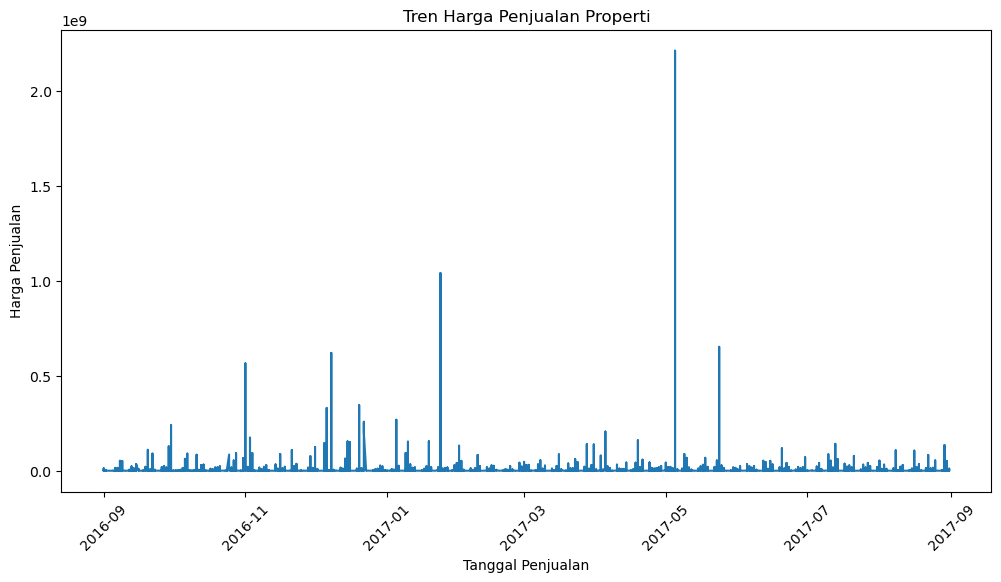

In [70]:
# Menyusun data berdasarkan tanggal penjualan
df_clean['SALE DATE'] = pd.to_datetime(df_clean['SALE DATE'])
df_clean = df_clean.sort_values('SALE DATE')

# Grafik garis harga penjualan selama satu tahun
plt.figure(figsize=(12, 6))
plt.plot(df_clean['SALE DATE'], df_clean['SALE PRICE'])
plt.xlabel('Tanggal Penjualan')
plt.ylabel('Harga Penjualan')
plt.title('Tren Harga Penjualan Properti')
plt.xticks(rotation=45)
plt.show()

## Kesimpulan

1. Pada Tahun 1920 yang memiliki Sale Price Tertinggi yaitu sebsar 4.371.608.893
2. Measure of Tendency 
    - Rata-rata Harga Penjualan pada Tahun 1920 sebesar 973632.27
    - Median Harga penjualan pada Tahun 1920 yaitu 488000.00
    - Modus Harga Penjualan pada Tahun 1920 yaitu sebesar
    
3. Measure of Spread 
    - Rentang (Range) menunjukkan variasi yang signifikan antara nilai tertinggi dan terendah pada atribut LAND SQUARE FEET, GROSS SQUARE FEET, dan SALE PRICE pada tahun 1920.

    - Varians (Variance) menunjukkan tingkat variasi atau perbedaan dalam atribut LAND SQUARE FEET, GROSS SQUARE FEET, dan SALE PRICE pada tahun 1920. Nilai varians yang tinggi menunjukkan variasi yang besar antara data properti.

    - Standar deviasi (Standard Deviation) menunjukkan seberapa jauh data tersebar dari nilai rata-rata pada atribut LAND SQUARE FEET, GROSS SQUARE FEET, dan SALE PRICE pada tahun 1920. Standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam data properti.
    
4. Probability Distribution Pada Tahun 1920 

    - Berdasarkan nilai rata-rata (mean) sebesar 973,632.27 dan median sebesar 488,000.00, serta memperhatikan skewness yang condong ke kiri, dapat disimpulkan bahwa sebagian besar harga penjualan properti di Midtown cenderung berada di kisaran yang relatif rendah hingga menengah. Ini ditunjukkan oleh keberadaan nilai-nilai yang lebih rendah di sisi kiri histogram.

    - Selain itu, rentang data yang cukup besar, dengan nilai minimum di sekitar 190,000.00 dan nilai maksimum yang jauh lebih tinggi, menunjukkan adanya variasi yang signifikan dalam harga penjualan properti di Midtown.

    - Dalam hal ini, nilai q1 (kuartil pertama) sebesar 190,000.00 dan q3 (kuartil ketiga) sebesar 795,000.00 memberikan informasi tentang distribusi harga penjualan properti secara lebih terperinci. Sebagian besar harga penjualan properti berada di antara kuartil pertama dan kuartil ketiga, dengan sebagian kecil properti yang memiliki harga penjualan yang lebih rendah atau lebih tinggi. 

5. Confidence interval (interval kepercayaan) 
    - Dengan tingkat kepercayaan 95 persen untuk rata-rata harga penjualan properti di - Midtown adalah antara 871.294 dan 1.075.970 Ini berarti dengan tingkat kepercayaan 95 persen, kita dapat mengatakan bahwa rata-rata sebenarnya dari harga penjualan properti di Midtown berada di antara rentang tersebut.

6. Hypothesis Testing

    - Dalam kasus ini, karena nilai p-value sangat kecil (lebih kecil dari tingkat signifikansi yang umumnya ditetapkan pada 0.05), kita dapat menolak hipotesis nol yang menyatakan bahwa tidak ada perbedaan dalam jumlah unit yang terjual antara properti yang dibangun antara tahun 1900-2000 dan tahun 2001 dan seterusnya. Dengan demikian, kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan dalam jumlah unit yang terjual antara kedua kelompok tersebut.

    - Dalam kasus ini, karena nilai p-Value sangat kecil (jauh lebih kecil dari tingkat signifikansi yang umumnya digunakan yaitu 0.05), kita dapat menolak hipotesis nol. Ini berarti ada perbedaan yang signifikan dalam jumlah unit yang terjual berdasarkan kategori bangunan.